<a href="https://colab.research.google.com/github/amrtariq/NTI_AI_Projects/blob/main/AlexNet_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AlexNet Covid-19 X-ray Classifiction

##Load and Prepare Data

In [ ]:
!wget http://cb.lk/covid_19  
!unzip covid_19

--2022-05-15 23:44:22--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-05-15 23:44:23--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-05-15 23:44:23--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-05

In [ ]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '/content/CovidDataset/Train/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False,seed=42)
       

test_set = test_datagen.flow_from_directory(
        '/content/CovidDataset/Val/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False,seed=42)


In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

##Model Fitting

In [ ]:
model=keras.Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), padding="same", activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2))) 
model.add(Conv2D(256, (5, 5),strides=(1,1),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding="same")) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu')) 
model.add(Dense(4096, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer="sgd", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
results=model.fit( train_set, epochs=10,validation_data=test_set,steps_per_epoch=7,validation_steps=2)


Epoch 1/10
7/7 [==============================] - 50s 7s/step - loss: 0.7040 - accuracy: 0.2455 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 46s 7s/step - loss: 0.6981 - accuracy: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.9667
Epoch 3/10
7/7 [==============================] - 46s 6s/step - loss: 0.6952 - accuracy: 0.5580 - val_loss: 0.6844 - val_accuracy: 0.5500
Epoch 4/10
7/7 [==============================] - 46s 7s/step - loss: 0.6935 - accuracy: 0.4688 - val_loss: 0.6822 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 47s 7s/step - loss: 0.6897 - accuracy: 0.6116 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 46s 7s/step - loss: 0.6907 - accuracy: 0.5402 - val_loss: 0.6776 - val_accuracy: 0.7333
Epoch 7/10
7/7 [==============================] - 46s 7s/step - loss: 0.6881 - accuracy: 0.5000 - val_loss: 0.6752 - val_accuracy: 0.9500
Epoch 8/10
7/7 [==================

##Model Results

In [ ]:
model.evaluate(train_set)

7/7 [==============================] - 15s 2s/step - loss: 0.6632 - accuracy: 0.8795


[0.6632238030433655, 0.8794642686843872]

In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 4s 1s/step - loss: 0.6636 - accuracy: 0.9000


[0.6635792851448059, 0.8999999761581421]

In [ ]:
y_pred= (model.predict(test_set)>=0.5).astype(int)

In [ ]:
#y_pred= ((model.predict(testing_set)>0.5)+0).ravel()

In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_set.labels,y_pred))
print(accuracy_score(test_set.labels,y_pred)*100)


[[24  6]
 [ 0 30]]
90.0


In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
#plt.ylim([0,1])

Text(0.5, 0, 'epoch')

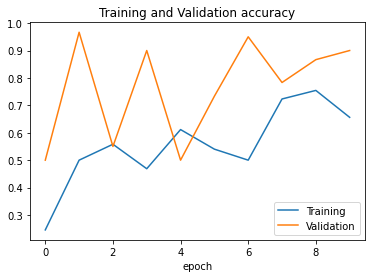

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
#plt.ylim([0,1])